### Edgar Moises Hernandez-Gonzalez
#### 08/07/19-06/02/20
#### Clasificar habla imaginada en EEG con LSTM

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [0]:
datos = pd.read_csv("/content/drive/My Drive/HablaImaginadaDL/Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072]
y = datos.iloc[:, 3072]

In [0]:
print(x.shape)
print(y.shape)

(132, 3072)
(132,)


In [0]:
n_samples = len(y)
print("n_samples:", n_samples)

n_samples: 132


In [0]:
n_classes = len(np.unique(y))
print("n_classes:", n_classes)

n_classes: 6


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
x = MinMaxScaler(feature_range=(-1,1)).fit_transform(x)

In [0]:
#convertir de 2D a 3D
x = x.reshape((n_samples, 6, 512))
print(x.shape)

(132, 6, 512)


In [0]:
x = np.transpose(x, (0,2,1))

print(x.shape)

(132, 512, 6)


In [0]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [0]:
model = Sequential()
model.add(LSTM(8, input_shape=(512, 6)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 480       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 6)                 54        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 64,
                    validation_data=(x_test, y_test), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 - 1s - loss: 1.8053 - acc: 0.1919 - val_loss: 1.8080 - val_acc: 0.1818
Epoch 2/40
99/99 - 1s - loss: 1.8020 - acc: 0.2424 - val_loss: 1.8079 - val_acc: 0.1818
Epoch 3/40
99/99 - 1s - loss: 1.8310 - acc: 0.1717 - val_loss: 1.8078 - val_acc: 0.1818
Epoch 4/40
99/99 - 1s - loss: 1.8161 - acc: 0.1919 - val_loss: 1.8077 - val_acc: 0.1818
Epoch 5/40
99/99 - 1s - loss: 1.8162 - acc: 0.1515 - val_loss: 1.8076 - val_acc: 0.1818
Epoch 6/40
99/99 - 1s - loss: 1.8422 - acc: 0.1313 - val_loss: 1.8075 - val_acc: 0.1818
Epoch 7/40
99/99 - 1s - loss: 1.8160 - acc: 0.1717 - val_loss: 1.8074 - val_acc: 0.1818
Epoch 8/40
99/99 - 1s - loss: 1.8239 - acc: 0.1616 - val_loss: 1.8073 - val_acc: 0.1818
Epoch 9/40
99/99 - 1s - loss: 1.8196 - acc: 0.2222 - val_loss: 1.8072 - val_acc: 0.1818
Epoch 10/40
99/99 - 1s - loss: 1.8170 - acc: 0.1515 - val_loss: 1.8071

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 2ms/sample - loss: 1.8052 - acc: 0.1818
Test loss: 1.8051550063219937
Test accuracy: 0.18181819


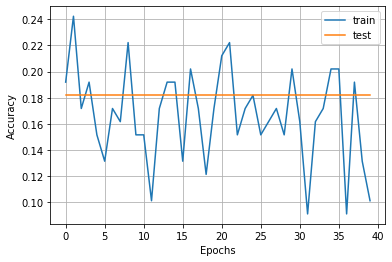

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

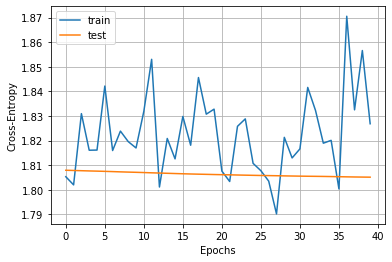

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()